In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import pickle as pkl

import scipy as sp
import matplotlib.pyplot as plt
import math

from sklearn.cluster import SpectralClustering

In [19]:
with open('../csv_files/exports_graphs_raw.pkl', 'rb') as file:
    export_graphs = pkl.load(file)

In [42]:
export_graphs[0].nodes()

NodeView(('AFG', 'AGO', 'ALB', 'ARG', 'AUS', 'AUT', 'BDI', 'BEL', 'BEN', 'BFA', 'BGR', 'BHR', 'BHS', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CRI', 'CUB', 'CYP', 'DEU', 'DJI', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'ETH', 'FIN', 'FJI', 'FRA', 'GAB', 'GBR', 'GHA', 'GIN', 'GLP', 'GMB', 'GNB', 'GNQ', 'GRC', 'GTM', 'GUF', 'GUY', 'HKG', 'HND', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KEN', 'KHM', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LKA', 'MAC', 'MAR', 'MDG', 'MEX', 'MLI', 'MLT', 'MMR', 'MNG', 'MOZ', 'MRT', 'MTQ', 'MUS', 'NCL', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PNG', 'POL', 'PRK', 'PRT', 'PRY', 'PYF', 'QAT', 'REU', 'ROU', 'RUS', 'SAU', 'SDN', 'SEN', 'SGP', 'SLE', 'SLV', 'SOM', 'SPM', 'SUR', 'SWE', 'SYR', 'TCD', 'TGO', 'THA', 'TLS', 'TTO', 'TUN', 'TUR', 'TWN', 'UGA', 'URY', 'USA', 'VEN', 'VNM', 'VUT', 'WSM', 'YE

In [20]:
from sklearn.metrics import silhouette_score

silhouettes = []
for c in range(2,20):
    train_clusters = []

    for g in export_graphs:
        # Compute the normalized Laplacian matrix of the graph
        laplacian = nx.normalized_laplacian_matrix(g)

        # Perform spectral clustering
        clustering = SpectralClustering(n_clusters=c, assign_labels='discretize', random_state=0).fit(laplacian.toarray())

        train_clusters.append(clustering.labels_)

        silhouette = silhouette_score(laplacian.toarray(), clustering.labels_)

    silhouettes.append(np.mean(silhouette))

/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trad

In [21]:
silhouettes

[0.029893479924786408,
 0.03059406972286832,
 0.022640242411854018,
 0.009392711403698576,
 0.007347461653486806,
 0.003336267187780522,
 0.0038420533732567114,
 0.0019128050081075182,
 0.0008284569444311013,
 0.0008454460661005347,
 -0.0007227092229668342,
 -0.0009623863419050655,
 -0.0021520959040381353,
 -0.0008584781993727141,
 -0.0005320891766171542,
 -0.002255507041349534,
 -0.004231750817495436,
 -0.0041206549462288865]

In [22]:
train_clusters = []

for g in export_graphs:
    # Compute the normalized Laplacian matrix of the graph
    laplacian = nx.normalized_laplacian_matrix(g)

    # Perform spectral clustering
    clustering = SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=0).fit(laplacian.toarray())

    train_clusters.append(clustering.labels_)

/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trad

In [38]:
with open('../csv_files/train_clusters.pkl', 'wb') as file:
    pkl.dump(train_clusters, file)

In [23]:
from sklearn.metrics import adjusted_rand_score

ari_scores_train = []

# Compute the Adjusted Rand Index
for c_1 in train_clusters:
    current_ari_scores = []
    for c_2 in train_clusters:
        ari = adjusted_rand_score(c_1, c_2)
        current_ari_scores.append(ari)
    ari_scores_train.append(current_ari_scores)

In [24]:
silhouettes = []
for c in range(10,25):
    train_graph_clustering = SpectralClustering(n_clusters=c, assign_labels='discretize', random_state=0).fit(ari_scores_train)

    silhouette = silhouette_score(ari_scores_train, train_graph_clustering.labels_)
    silhouettes.append(silhouette)

/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/sinclaireschuetze/Documents/GitHub/Trad

In [25]:
silhouettes

[0.337777471269799,
 0.323998166192785,
 0.3219085304427905,
 0.30469149901038245,
 0.317472730665656,
 0.320955633720141,
 0.31576642569468477,
 0.31770168820984307,
 0.31084540348323286,
 0.31714655232111405,
 0.3112015621030206,
 0.28757189174135955,
 0.2836720769625681,
 0.2907151822104061,
 0.2972869705145288]

In [26]:
train_graph_clustering = SpectralClustering(n_clusters=10, assign_labels='discretize', random_state=0).fit(ari_scores_train)

/Users/sinclaireschuetze/Documents/GitHub/Trade-GNN-ChangePoint/.env/lib/python3.11/site-packages/sklearn/cluster/_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


In [27]:
labels = train_graph_clustering.labels_

In [31]:
labels

array([9, 9, 9, 3, 9, 3, 3, 9, 9, 9, 9, 9, 0, 0, 9, 9, 9, 0, 9, 0, 0, 0,
       0, 0, 2, 9, 6, 6, 2, 6, 4, 2, 2, 9, 4, 4, 4, 4, 5, 5, 5, 5, 5, 8,
       8, 8, 8, 8, 8, 7, 7, 1, 1, 1, 1, 1, 1, 1, 7, 7])

In [32]:
centroids = []
for i in np.unique(labels):
    positions = []
    for t, j in enumerate(labels):
        if j == i:
            positions.append(t)
    mean_position = np.mean(positions)

    differences = np.abs(positions - mean_position)

    # Find the value in the array closest to the value
    closest_value = positions[np.argmin(differences)]

    centroids.append(closest_value)


In [33]:
centroids

[19, 54, 28, 5, 34, 40, 27, 50, 45, 11]

In [34]:
change_point_years = []
for i in centroids:
    change_point_years.append(i + 1962)

In [35]:
change_point_years

[1981, 2016, 1990, 1967, 1996, 2002, 1989, 2012, 2007, 1973]

In [43]:
export_graphs[0]

In [44]:
train_clusters

[array([1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0,
        1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1,
        2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 1,
        1, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0,
        2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 1,
        2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0

In [61]:
G = export_graphs[0]
clusters = train_clusters[0]

isolated_nodes = list(nx.isolates(G))

nodes = list(G.nodes())

indices = [nodes.index(item) for item in isolated_nodes if item in nodes]

filtered_clusters = [item for i, item in enumerate(clusters) if i not in indices]

In [64]:
graph = G.remove_nodes_from(list(nx.isolates(G)))

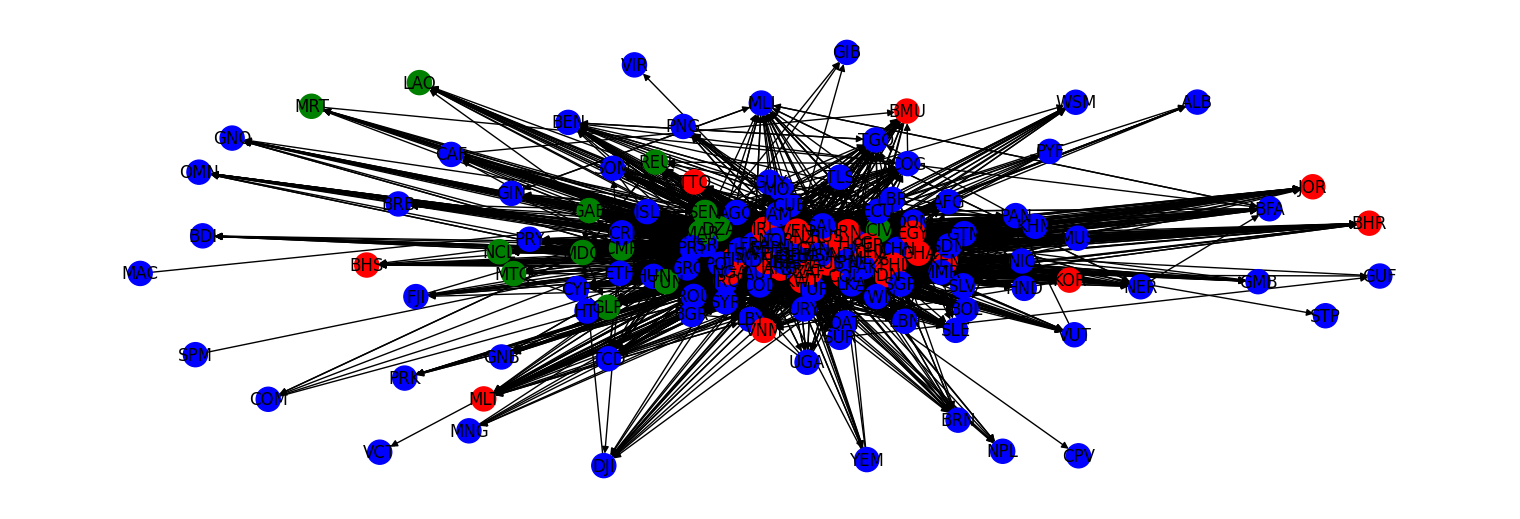

In [71]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# And a dictionary where keys are nodes and values are clusters
color_dict = {0: 'red', 1: 'blue', 2: 'green'}
pos = nx.spring_layout(G, k = 120)
# Draw the graph
color_list = [color_dict[i] for i in filtered_clusters]
nx.draw(G, pos, with_labels=True, node_color=color_list)
plt.show()